In [1]:
import os

from src.significance_calculator import calculate_approx_global_significance, load_data_from_folder

In [2]:
z_prime_parameters = {
    r"g_{Z'}": 1.0,  # global coupling constant for Z'
    r"\zeta_Q": 0,  # bottom left
    r"\zeta_L": 0,  # tau left
    r"\zeta_b": 1.0,  # bottom right
    r"\zeta_\tau": 1.0,  # tau right
}

vlq_parameters = {
    r"$g_U$": 1.0,  # global coupling constant for VLQ
    r"$\beta_L$": 0,  # tau left
    r"$\beta_R$": 1.0,  # tau right
}

slq_parameters = {
    r"$y_S$": 1.0,  # global coupling constant for SL
}

scale_factors = {
    "Zprime_tau_m_right_bottom_right": (
        z_prime_parameters[r"\zeta_b"] * z_prime_parameters[r"\zeta_\tau"] * z_prime_parameters[r"g_{Z'}"] ** 2
    )
    ** 2,
    "Zprime_tau_m_right_bottom_left": (
        z_prime_parameters[r"\zeta_Q"] * z_prime_parameters[r"\zeta_\tau"] * z_prime_parameters[r"g_{Z'}"] ** 2
    )
    ** 2,
    "Zprime_tau_m_left_bottom_right": (
        z_prime_parameters[r"\zeta_b"] * z_prime_parameters[r"\zeta_L"] * z_prime_parameters[r"g_{Z'}"] ** 2
    )
    ** 2,
    "Zprime_tau_m_left_bottom_left": (
        z_prime_parameters[r"\zeta_Q"] * z_prime_parameters[r"\zeta_L"] * z_prime_parameters[r"g_{Z'}"] ** 2
    )
    ** 2,
    "vLQ_tau_m_L_tau_p_R": ((vlq_parameters[r"$\beta_L$"] ** 2) * (vlq_parameters[r"$g_U$"] ** 2)) ** 2,
    "vLQ_tau_m_R_tau_p_L": ((vlq_parameters[r"$\beta_R$"] ** 2) * (vlq_parameters[r"$g_U$"] ** 2)) ** 2,
    "vLQ_tau_m_L_tau_p_L": (
        vlq_parameters[r"$\beta_L$"] * vlq_parameters[r"$\beta_R$"] * (vlq_parameters[r"$g_U$"] ** 2)
    )
    ** 2,
    "vLQ_tau_m_R_tau_p_R": (
        vlq_parameters[r"$\beta_L$"] * vlq_parameters[r"$\beta_R$"] * (vlq_parameters[r"$g_U$"] ** 2)
    )
    ** 2,
    "sLQ_tau_m_right": slq_parameters[r"$y_S$"] ** 4,  # global coupling constant for SL
    "sLQ_tau_m_left": slq_parameters[r"$y_S$"] ** 4,  # global coupling constant for SL
}

In [3]:
current_folder = os.getcwd()
data_folder = os.path.join(current_folder, "data")


bkg_folder = os.path.join(data_folder, "bkgs")
feather_files = [f for f in os.listdir(bkg_folder) if f.endswith(".feather")]

# sort feather files by name
feather_files.sort()

In [4]:
backgrounds = load_data_from_folder(bkg_folder)

In [5]:
backgrounds["ww"].columns

Index(['cross_section_delphes(pb)', 'n_events_delphes', 'tau_m_pt',
       'tau_m_eta', 'tau_m_phi', 'tau_m_mass', 'tau_m_TauWeight',
       'tau_m_Charge', 'tau_m_type', 'tau_m_NCharged', 'tau_m_NNeutrals',
       'tau_m_ChargedEnergyFraction', 'tau_m_NeutralEnergyFraction',
       'tau_p_pt', 'tau_p_eta', 'tau_p_phi', 'tau_p_mass', 'tau_p_TauWeight',
       'tau_p_Charge', 'tau_p_type', 'tau_p_NCharged', 'tau_p_NNeutrals',
       'tau_p_ChargedEnergyFraction', 'tau_p_NeutralEnergyFraction',
       'n_light_jets', 'HT', 'met_pt', 'met_phi', 'label', 'lead_bjet_pt',
       'lead_bjet_eta', 'lead_bjet_phi', 'lead_bjet_mass',
       'n_events_preselected', 'sublead_bjet_pt', 'sublead_bjet_eta',
       'sublead_bjet_phi', 'sublead_bjet_mass', 'n_events_pt_cut',
       'event_type', 'n_events_by_type', 'eff_by_type', 'visible_mass',
       'visible_met_mass', 'collinear_mass', 'st_taus', 'st_taus_met',
       'tau_m_ChargedEnergyAsymmetry', 'tau_p_ChargedEnergyAsymmetry'],
      dtype='obj

Events satisfying the trigger selections must pass additional offline lepton requirements targeting the $Z^{\prime} \rightarrow \tau^{+} \tau^{-}$ and $Z^{\prime} \rightarrow \mathrm{W}^{+} \mathrm{W}^{-}$ decay chains. 

- An event must contain exactly one pair of leptons having opposite-sign electric charge (OS). 
- The muon in the $\mu \tau_{\mathrm{h}}(\mathrm{e} \mu)$ channel is required to have $p_{\mathrm{T}}>35(30) \mathrm{GeV}$ within $|\eta|<2.1$. The electron in the $\mathrm{e} \tau_{\mathrm{h}}(\mathrm{e} \mu)$ channel is required to have $p_{\mathrm{T}}>55(10) \mathrm{GeV}$ within $|\eta|<2.1$. 
- The $\tau_{\mathrm{h}}$ candidates in the $\tau_{\mathrm{h}} \tau_{\mathrm{h}}\left(\mu \tau_{\mathrm{h}} \& \mathrm{e} \tau_{\mathrm{h}}\right)$ channel are required to have $p_{\mathrm{T}}>70(20) \mathrm{GeV}$ within $|\eta|<2.1$, where the trigger is fully efficient. 

These requirements constitute the dilepton selection.

In [6]:
channel_queries = {}

pid = {
    # muon mass 0.105658
    "muon_m": "(tau_m_type == 'lep') & (tau_m_mass == 0.105658)",
    "muon_p": "(tau_p_type == 'lep') & (tau_p_mass == 0.105658)",
    # electron mass 0.000511
    "electron_m": "(tau_m_type == 'lep') & (tau_m_mass == 0.000511)",
    "electron_p": "(tau_p_type == 'lep') & (tau_p_mass == 0.000511)",
    # for hadronic 
    "tau_had_m": "(tau_m_type == 'had')",
    "tau_had_p": "(tau_p_type == 'had')",
}


In [7]:
# Subqueries específicas para el canal μe
mu_e_sub = {
    "muon_m_electron_p": f"({pid['muon_m']}) & ({pid['electron_p']}) & (tau_m_pt > 30) & (tau_p_pt > 10)",
    "muon_p_electron_m": f"({pid['muon_p']}) & ({pid['electron_m']}) & (tau_p_pt > 30) & (tau_m_pt > 10)",
}

channel_queries["mu_e"] = f"({mu_e_sub['muon_m_electron_p']}) | ({mu_e_sub['muon_p_electron_m']})"

In [8]:
# Subqueries específicas para el canal μτ_h
mu_tau_h_sub = {
    "muon_m_tau_had_p": f"({pid['muon_m']}) & ({pid['tau_had_p']}) & (tau_m_pt > 35) & (tau_p_pt > 20)",
    "muon_p_tau_had_m": f"({pid['muon_p']}) & ({pid['tau_had_m']}) & (tau_p_pt > 35) & (tau_m_pt > 20)",
}

channel_queries["mu_tau_h"] = f"({mu_tau_h_sub['muon_m_tau_had_p']}) | ({mu_tau_h_sub['muon_p_tau_had_m']})"

In [9]:
# Subqueries específicas para el canal eτ_h
e_tau_h_sub = {
    "electron_m_tau_had_p": f"({pid['electron_m']}) & ({pid['tau_had_p']}) & (tau_m_pt > 55) & (tau_p_pt > 20)",
    "electron_p_tau_had_m": f"({pid['electron_p']}) & ({pid['tau_had_m']}) & (tau_p_pt > 55) & (tau_m_pt > 20)",
}
channel_queries["e_tau_h"] = f"({e_tau_h_sub['electron_m_tau_had_p']}) | ({e_tau_h_sub['electron_p_tau_had_m']})"



In [ ]:

# Query para el canal τ_hτ_h (sin subqueries por ser más directo)
channel_queries["tau_h_tau_h"] = f"({pid['tau_had_m']}) & ({pid['tau_had_p']}) & (tau_m_pt > 70) & (tau_p_pt > 70)"

In [11]:
# Subqueries para cortes básicos
basic_cuts = {
    "opposite_charge": "(tau_m_Charge * tau_p_Charge < 0)",
    "eta_acceptance": "(abs(tau_m_eta) < 2.1) & (abs(tau_p_eta) < 2.1)",
    "no_bjets": "label == 'ditau_no_bjets'",
}

basic_cuts_query = " & ".join(f"({cut})" for cut in basic_cuts.values())

channel_queries = {
  key: f"({query}) & ({basic_cuts_query})" for key, query in channel_queries.items()
}

# Para usar una query específica:
# df_mu_e = df.query(channel_queries["mu_e"])

In [12]:
import pandas as pd
from src.adaptive_binning import adaptive_bin_edges_v2


observables = [
    "visible_mass",
    "visible_met_mass",
    "collinear_mass",
    "st_taus",
    "st_taus_met",
]

In [13]:
observable = "collinear_mass"

# check that the observable is in the bin edges
if observable not in observables:
    raise ValueError(f"Observable '{observable}' not found in bin edges.")

In [14]:
# Definir las consultas de filtrado para seleccionar eventos específicos
# query_a = "event_type == 'hadronic'"  # Solo eventos hadrónicos
# query_b = "label == 'ditau_no_bjets'"  # Solo eventos ditau sin jets-b
# query_c = "((tau_p_pt > 70) | (tau_m_pt > 70))"  # Cortes de pT para ambos taus
query_total = channel_queries["mu_e"]  # Combinar todas las condiciones

bkg_df = (pd.concat([bkg for bkg in backgrounds.values()]).reset_index(drop=True)).query(query_total)
bin_edges = {
    key: adaptive_bin_edges_v2(
        samples=bkg_df[key].values,
        weights=bkg_df["cross_section_delphes(pb)"].values * 3000 * 1000,  # Luminosity in pb^-1
        x_min=50,
        bin_width=10,
        max_rel_error=0.15,
    )
    for key in observables
}

In [15]:
def calculate_model_significances(
    model, masses, data_folder, backgrounds, scale_factors, observable, bin_edges, queries, lumi
):
    significances = {}
    for mass in masses:
        signals = load_data_from_folder(os.path.join(data_folder, model, str(mass)))
        significances[mass] = calculate_approx_global_significance(
            signals,
            backgrounds,
            model,
            scale_factors,
            observable,
            bin_edges,
            queries,
            lumi,
        )
    return significances


# Configuration
masses = list(range(500, 2000, 250))
lumi = 3000 * 1000  # in pb-1, converted to fb-1 for consistency with the scale factors


# Define models to analyze
models = ["Zprime", "vLQ", "sLQ"]


# Calculate significances for all models
all_significances = {}
for model in models:
    print(f"Calculating significances for {model}...")
    all_significances[model] = calculate_model_significances(
        model, masses, data_folder, backgrounds, scale_factors, observable, bin_edges[observable], list(channel_queries.values()), lumi
    )
    print(f"  Completed {model}")

print("All calculations completed!")

Calculating significances for Zprime...
  Completed Zprime
Calculating significances for vLQ...
  Completed vLQ
Calculating significances for sLQ...
  Completed sLQ
All calculations completed!


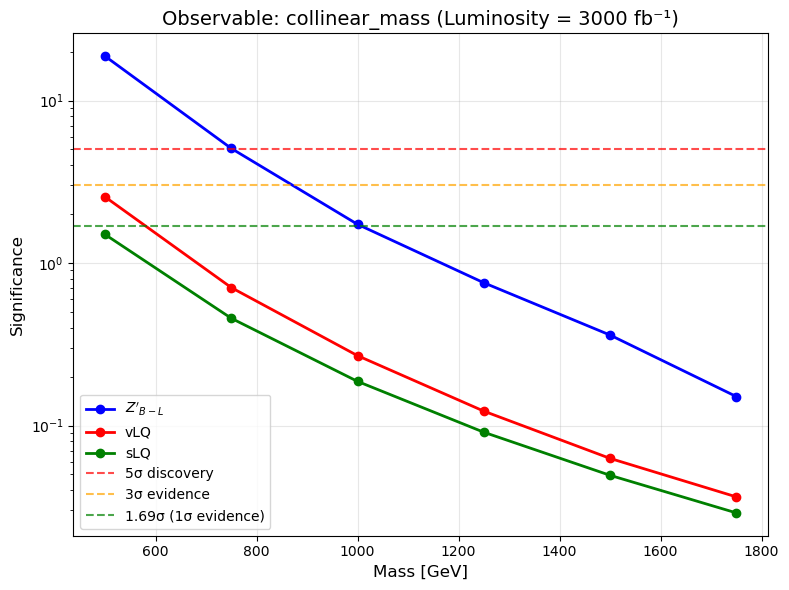

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors and markers for each model
model_styles = {
    "Zprime": {"color": "blue", "marker": "o", "label": r"$Z'_{B-L}$"},
    "vLQ": {"color": "red", "marker": "o", "label": "vLQ"},
    "sLQ": {"color": "green", "marker": "o", "label": "sLQ"},
}

# Create the combined plot
plt.figure(figsize=(8, 6))

# Plot each model using the all_significances dictionary
for model, significances in all_significances.items():
    masses_plot = list(significances.keys())
    significances_plot = list(significances.values())

    style = model_styles.get(model, {"color": "black", "marker": "o", "label": model})
    plt.plot(
        masses_plot,
        significances_plot,
        color=style["color"],
        marker=style["marker"],
        linestyle="-",
        linewidth=2,
        markersize=6,
        label=style["label"],
    )

plt.xlabel("Mass [GeV]", fontsize=12)
plt.ylabel("Significance", fontsize=12)
plt.title(f"Observable: {observable} (Luminosity = {lumi/1000:.0f} fb⁻¹)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale("log")  # Use log scale for y-axis since significances vary over orders of magnitude

# Add horizontal lines for reference
plt.axhline(y=5, color="r", linestyle="--", alpha=0.7, label="5σ discovery")
plt.axhline(y=3, color="orange", linestyle="--", alpha=0.7, label="3σ evidence")
plt.axhline(y=1.69, color="green", linestyle="--", alpha=0.7, label="1.69σ (1σ evidence)")

plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Calculate significances for both observables
observables = ["visible_met_mass", "collinear_mass"]
all_significances_by_observable = {}

for obs in observables:
    print(f"Calculating significances for observable: {obs}")
    all_significances_by_observable[obs] = {}

    for model in models:
        print(f"  Processing {model}...")
        all_significances_by_observable[obs][model] = calculate_model_significances(
            model, masses, data_folder, backgrounds, scale_factors, obs, bin_edges[obs], list(channel_queries.values()), lumi
        )
    print(f"  Completed {obs}")

print("All calculations for both observables completed!")

Calculating significances for observable: visible_met_mass
  Processing Zprime...


  Processing vLQ...
  Processing sLQ...
  Completed visible_met_mass
Calculating significances for observable: collinear_mass
  Processing Zprime...
  Processing vLQ...
  Processing sLQ...
  Completed collinear_mass
All calculations for both observables completed!


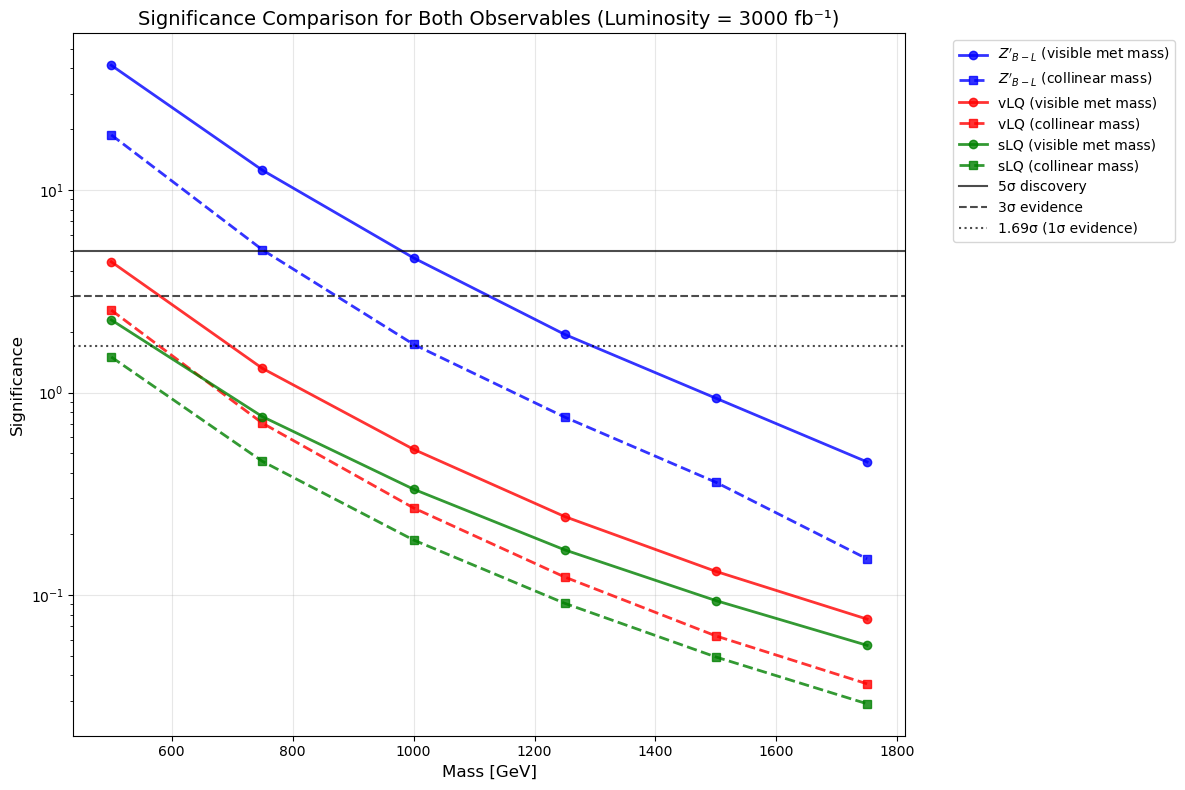

In [18]:
# Create combined plot with both observables
plt.figure(figsize=(12, 8))

# Define line styles and markers for observables
observable_styles = {
    "visible_met_mass": {"linestyle": "-", "alpha": 0.8, "marker": "o"},
    "collinear_mass": {"linestyle": "--", "alpha": 0.8, "marker": "s"},
}

# Plot each model for both observables
for model in models:
    style = model_styles.get(model, {"color": "black", "marker": "o", "label": model})

    for obs in observables:
        significances = all_significances_by_observable[obs][model]
        masses_plot = list(significances.keys())
        significances_plot = list(significances.values())

        obs_style = observable_styles[obs]
        label = f"{style['label']} ({obs.replace('_', ' ')})"

        plt.plot(
            masses_plot,
            significances_plot,
            color=style["color"],
            marker=obs_style["marker"],
            linestyle=obs_style["linestyle"],
            linewidth=2,
            markersize=6,
            alpha=obs_style["alpha"],
            label=label,
        )

plt.xlabel("Mass [GeV]", fontsize=12)
plt.ylabel("Significance", fontsize=12)
plt.title(f"Significance Comparison for Both Observables (Luminosity = {lumi/1000:.0f} fb⁻¹)", fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale("log")  # Use log scale for y-axis since significances vary over orders of magnitude

# Add horizontal lines for reference
plt.axhline(y=5, color="black", alpha=0.7, label="5σ discovery")
plt.axhline(y=3, color="black", linestyle="--", alpha=0.7, label="3σ evidence")
plt.axhline(y=1.69, color="black", linestyle=":", alpha=0.7, label="1.69σ (1σ evidence)")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [19]:
# Calculate significances for all observables for each model
observables = [
    "visible_mass",
    "visible_met_mass",
    "collinear_mass",
    "st_taus",
    "st_taus_met",
]

print("Calculating significances for all observables...")
all_significances_all_obs = {}

for model in models:
    print(f"Processing model: {model}")
    all_significances_all_obs[model] = {}

    for obs in observables:
        print(f"  Observable: {obs}")
        all_significances_all_obs[model][obs] = calculate_model_significances(
            model, masses, data_folder, backgrounds, scale_factors, obs, bin_edges[obs], list(channel_queries.values()), lumi
        )
    print(f"Completed {model}")

print("All calculations for all observables completed!")

Calculating significances for all observables...
Processing model: Zprime
  Observable: visible_mass


  Observable: visible_met_mass
  Observable: collinear_mass
  Observable: st_taus
  Observable: st_taus_met
Completed Zprime
Processing model: vLQ
  Observable: visible_mass
  Observable: visible_met_mass
  Observable: collinear_mass
  Observable: st_taus
  Observable: st_taus_met
Completed vLQ
Processing model: sLQ
  Observable: visible_mass
  Observable: visible_met_mass
  Observable: collinear_mass
  Observable: st_taus
  Observable: st_taus_met
Completed sLQ
All calculations for all observables completed!


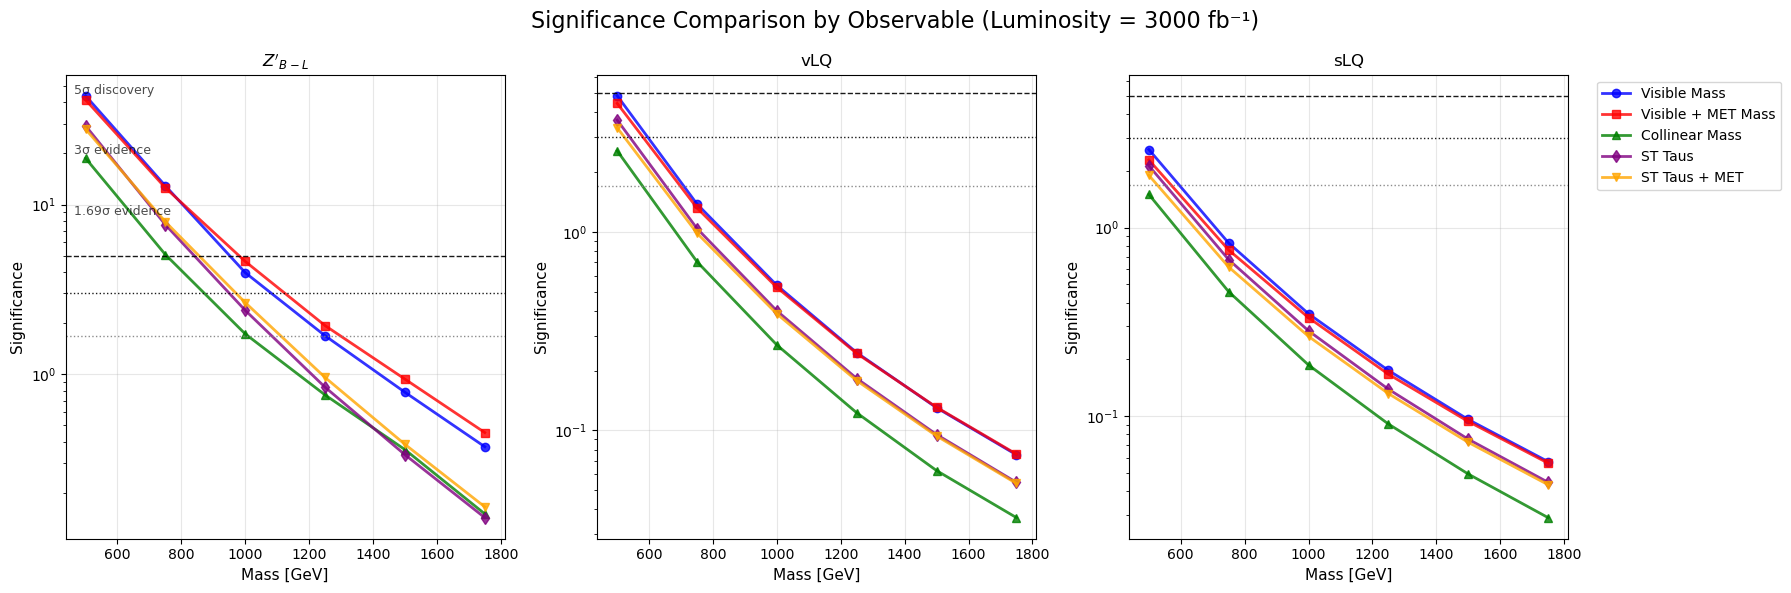

In [20]:
# Define colors and styles for each observable
observable_colors_styles = {
    "visible_mass": {"color": "blue", "marker": "o", "linestyle": "-", "label": "Visible Mass"},
    "visible_met_mass": {"color": "red", "marker": "s", "linestyle": "-", "label": "Visible + MET Mass"},
    "collinear_mass": {"color": "green", "marker": "^", "linestyle": "-", "label": "Collinear Mass"},
    "st_taus": {"color": "purple", "marker": "d", "linestyle": "-", "label": "ST Taus"},
    "st_taus_met": {"color": "orange", "marker": "v", "linestyle": "-", "label": "ST Taus + MET"},
}

# Create individual plots for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Significance Comparison by Observable (Luminosity = {lumi/1000:.0f} fb⁻¹)", fontsize=16)

for i, model in enumerate(models):
    ax = axes[i]

    # Plot each observable for this model
    for obs in observables:
        if obs in all_significances_all_obs[model]:
            significances = all_significances_all_obs[model][obs]
            masses_plot = list(significances.keys())
            significances_plot = list(significances.values())

            style = observable_colors_styles[obs]
            ax.plot(
                masses_plot,
                significances_plot,
                color=style["color"],
                marker=style["marker"],
                linestyle=style["linestyle"],
                linewidth=2,
                markersize=6,
                label=style["label"],
                alpha=0.8,
            )

    # Customize each subplot
    ax.set_xlabel("Mass [GeV]", fontsize=11)
    ax.set_ylabel("Significance", fontsize=11)
    ax.set_title(f'{model_styles[model]["label"]}', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.set_yscale("log")

    # Add reference lines
    ax.axhline(y=5, color="black", linestyle="--", alpha=0.9, linewidth=1)
    ax.axhline(y=3, color="black", linestyle=":", alpha=0.9, linewidth=1)
    ax.axhline(y=1.69, color="gray", linestyle=":", alpha=0.9, linewidth=1)

    # Add legend only to the last subplot to avoid clutter
    if i == len(models) - 1:
        ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Add reference lines labels manually
axes[0].text(0.02, 0.98, "5σ discovery", transform=axes[0].transAxes, verticalalignment="top", fontsize=9, alpha=0.7)
axes[0].text(0.02, 0.85, "3σ evidence", transform=axes[0].transAxes, verticalalignment="top", fontsize=9, alpha=0.7)
axes[0].text(0.02, 0.72, "1.69σ evidence", transform=axes[0].transAxes, verticalalignment="top", fontsize=9, alpha=0.7)

plt.tight_layout()
plt.show()

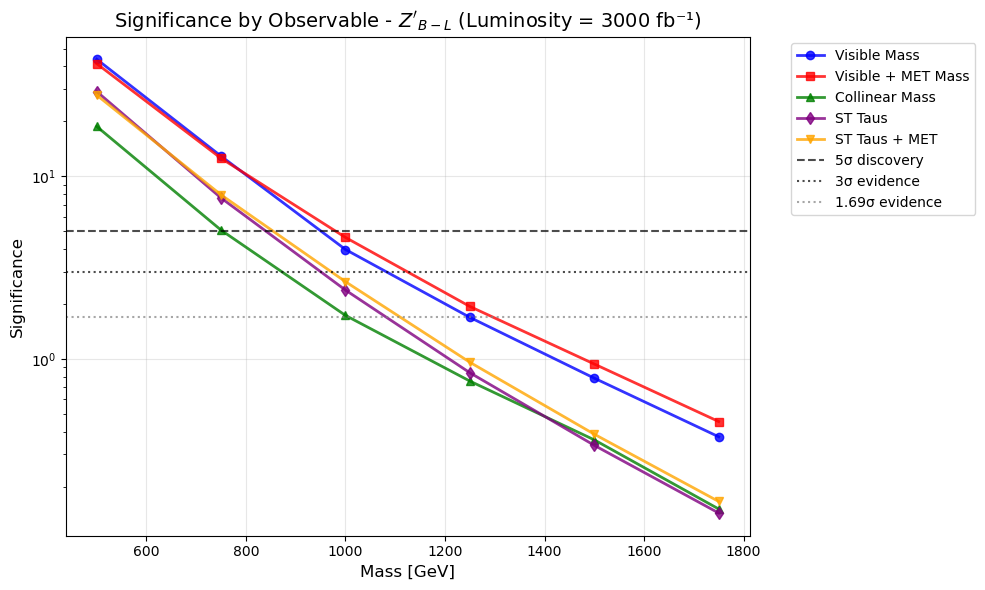

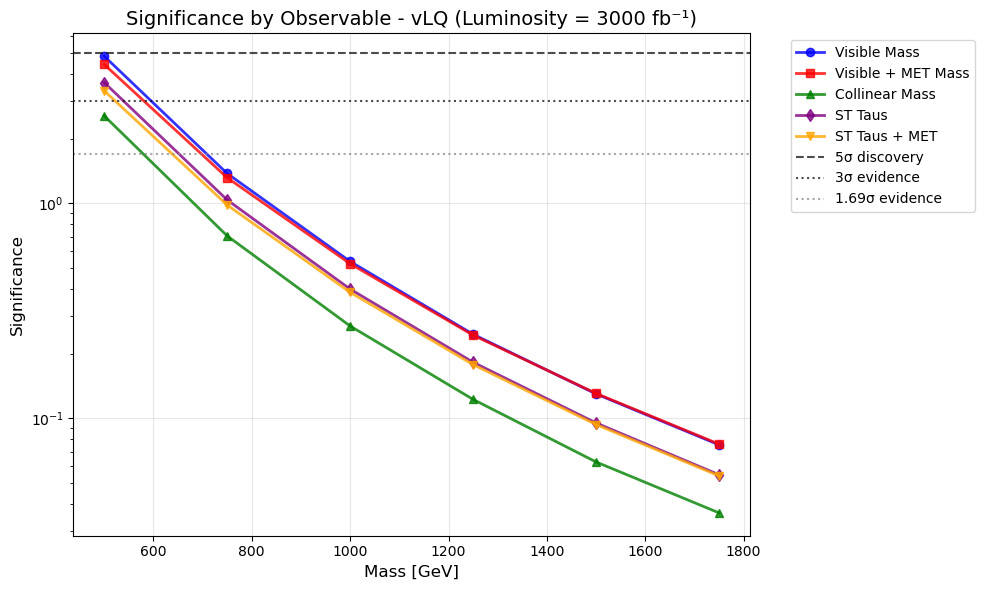

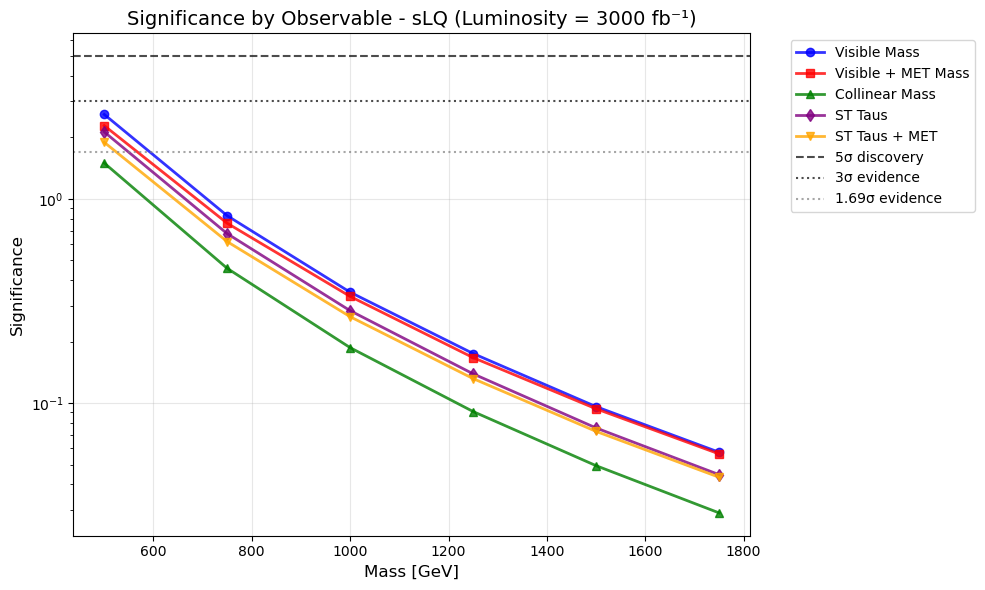

In [21]:
# Alternative: Create separate individual plots for each model
for model in models:
    plt.figure(figsize=(10, 6))

    # Plot each observable for this model
    for obs in observables:
        if obs in all_significances_all_obs[model]:
            significances = all_significances_all_obs[model][obs]
            masses_plot = list(significances.keys())
            significances_plot = list(significances.values())

            style = observable_colors_styles[obs]
            plt.plot(
                masses_plot,
                significances_plot,
                color=style["color"],
                marker=style["marker"],
                linestyle=style["linestyle"],
                linewidth=2,
                markersize=6,
                label=style["label"],
                alpha=0.8,
            )

    plt.xlabel("Mass [GeV]", fontsize=12)
    plt.ylabel("Significance", fontsize=12)
    plt.title(
        f'Significance by Observable - {model_styles[model]["label"]} (Luminosity = {lumi/1000:.0f} fb⁻¹)', fontsize=14
    )
    plt.grid(True, alpha=0.3)
    plt.yscale("log")

    # Add horizontal lines for reference
    plt.axhline(y=5, color="black", linestyle="--", alpha=0.7, label="5σ discovery")
    plt.axhline(y=3, color="black", linestyle=":", alpha=0.7, label="3σ evidence")
    plt.axhline(y=1.69, color="gray", linestyle=":", alpha=0.7, label="1.69σ evidence")

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()